# Supplementary Figure 4: Unable to fit demographic models to extreme synonymous selection`

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn
from matplotlib.lines import Line2D
import re
import ast

# Demographic model comparison with data in 100% s=1e-3 case

## Extract Data

In [28]:
condition_sym_syn='E3' #PartialE5 0_Recom7, E5_Partial_R7, E5, 0_Recom6, E5_Recom6
condition_sym_ns='E3' #PartialE4, PartialE5, 0_Recom7, E5_Partial_R7, E5, 0_Recom6, E5_Recom6
condition_dadioutput='E3' #E4_Partial, E4Partial_ZeroSyn, E5_Partial_R7, Zero_Recom7, E5, E5_Partial, Zero_Recom7, E5_Recom6
replicate='10'

In [29]:
experimental_syn_sfs_file='/u/project/klohmuel/amzurita/Synonimous_Selection_Simulations/Dadi_Fits/Summed_SFS/Syn_SFS_DadiInput_'+condition_sym_syn+'_Replicate'+replicate+'.txt'
experimental_nonsyn_sfs_file='/u/project/klohmuel/amzurita/Synonimous_Selection_Simulations/Dadi_Fits/Summed_SFS/NonSyn_SFS_DadiInput_'+condition_sym_ns+'_Replicate'+replicate+'.txt'

In [30]:
print(experimental_syn_sfs_file)
print(experimental_nonsyn_sfs_file)

/u/project/klohmuel/amzurita/Synonimous_Selection_Simulations/Dadi_Fits/Summed_SFS/Syn_SFS_DadiInput_E3_Replicate10.txt
/u/project/klohmuel/amzurita/Synonimous_Selection_Simulations/Dadi_Fits/Summed_SFS/NonSyn_SFS_DadiInput_E3_Replicate10.txt


In [31]:
with open(experimental_syn_sfs_file, 'r') as file:
    syn_sfs_extract=file.readlines()[1].strip()
    to_parse='['+syn_sfs_extract.replace(' ',',')+']'
    syn_sfs=ast.literal_eval(to_parse)[1:]
    
with open(experimental_nonsyn_sfs_file, 'r') as file:
    nonsyn_sfs_extract=file.readlines()[1].strip()
    to_parse='['+nonsyn_sfs_extract.replace(' ',',')+']'
    nonsyn_sfs=ast.literal_eval(to_parse)[1:]

## Load DaDi SFS

In [32]:
#Load the filenames
input_file_demography='/u/project/klohmuel/amzurita/Synonimous_Selection_Simulations/Dadi_Fits/DadiFits_OutputFiles/'+condition_dadioutput+'_TwoEpoch_Replicate'+replicate+'_two_epoch_demography.txt'
input_file_dfe='/u/project/klohmuel/amzurita/Synonimous_Selection_Simulations/Dadi_Fits/DadiFits_OutputFiles/'+condition_dadioutput+'_TwoEpoch_Replicate'+replicate+'_inferred_DFE.txt'
input_file_log='/u/project/klohmuel/amzurita/Synonimous_Selection_Simulations/Dadi_Fits/DadiFits_OutputFiles/'+condition_dadioutput+'_TwoEpoch_Replicate'+replicate+'_log.log'

In [33]:
print(input_file_demography)

/u/project/klohmuel/amzurita/Synonimous_Selection_Simulations/Dadi_Fits/DadiFits_OutputFiles/E3_TwoEpoch_Replicate10_two_epoch_demography.txt


In [34]:
#Parse the scaled demography
with open(input_file_demography, 'r') as file:
    for line in file:
        if 'Maximum multinomial log composite likelihood: ' in line:
            parsed_params=line.strip().strip('.').split(': ')[1]
            print(parsed_params)
            likelihood_model=float(parsed_params)
        elif 'Scaled best-fit model spectrum: ' in line:
            parsed_params=line.strip().strip('.').split(': ')[1]
            parsed_params=parsed_params.strip('[--').strip('--]')
            values=parsed_params.split()
        #Get the theta value
        elif 'Optimal value of theta_syn: ' in line:
            parsed_params=line.strip().strip('.').split(': ')[1]
            theta_syn=float(parsed_params)
            print(theta_syn)
        #Get the best fit parameteres
        elif 'Best fit parameters: ' in line:
            parsed_params=line.strip().strip('.').split(': ')[1]
            parsed_params=parsed_params.strip('[').strip(']')
            demog_params=[float(x.strip(',')) for x in parsed_params.split()]
            print(demog_params)
        
        
            
dadi_sfs=[float(x) for x in values]
dadi_sfs.append(0)
dadi_sfs=np.array(dadi_sfs)
print(dadi_sfs)

[2453.32681323, 268.50305753]
-119.24575749230671
2.333334625714205
[4.84564845e+03 2.05102145e+03 1.15731308e+03 7.34547517e+02
 4.97219123e+02 3.50532554e+02 2.54133030e+02 1.88044567e+02
 1.41321009e+02 1.07510244e+02 8.25954017e+01 6.39677153e+01
 4.98752084e+01 3.91090455e+01 3.08164349e+01 2.43845585e+01
 1.93661585e+01 1.54304801e+01 1.23301483e+01 9.87833813e+00
 7.93275508e+00 6.38421651e+00 5.14840078e+00 4.15981198e+00
 3.36731787e+00 2.73081910e+00 2.21874175e+00 1.80613502e+00
 1.47321820e+00 1.20426380e+00 9.86734447e-01 8.10612330e-01
 6.67875945e-01 5.52090066e-01 4.58083216e-01 3.81693097e-01
 3.19565025e-01 2.68991879e-01 2.27786686e-01 1.94180938e-01
 1.66743275e-01 1.44314322e-01 1.25954380e-01 1.10901361e-01
 9.85369190e-02 8.83591281e-02 7.99604283e-02 7.30097922e-02
 6.72382952e-02 6.24274264e-02 5.83996136e-02 5.50105376e-02
 5.21428944e-02 4.97013308e-02 4.76083318e-02 4.58008790e-02
 4.42277355e-02 4.28472398e-02 4.16255117e-02 4.05349943e-02
 3.95532689e-02 3

In [35]:
#Parse the scaled DFE fit. 
#The first are sorted by likelihood.

DFE_params_all=[]
Non_Syn_SFS_all=[]
poisson_ll_all=[]

with open(input_file_dfe, 'r') as file:
    for line in file:
        if 'The population-scaled best-fit parameters: ' in line:
            DFE_params_toparse=line.strip().strip('.').split(': ')[1]
            DFE_params=DFE_params_toparse.strip('[').strip(']').split()
            print(DFE_params)
            DFE_params_all.append([float(x) for x in DFE_params])
        elif 'The expected SFS is: ' in line:
            parsed_params=line.strip().strip('.').split(': ')[1]
            parsed_params=parsed_params.strip('[--').strip('--]')
            values=parsed_params.split()
            dadi_nonsyn_sfs=[float(x) for x in values]
            dadi_nonsyn_sfs.append(0)
            dadi_nonsyn_sfs=np.array(dadi_nonsyn_sfs)
            Non_Syn_SFS_all.append(dadi_nonsyn_sfs)
            #print(dadi_nonsyn_sfs)
        elif 'The maximum poisson log composite likelihood is: ' in line:
            parsed_params=line.strip().strip('.').split(': ')[1]
            #print(parsed_params)
            if parsed_params == '--':
                parsed_params = -np.Infinity
            poisson_ll_all.append(float(parsed_params))

['2.77346615e-01', '3.99760142e+08']
['2.77346615e-01', '3.99760142e+08']
['2.77346604e-01', '3.99760142e+08']
['2.77346614e-01', '3.99760142e+08']
['2.77346613e-01', '3.99760142e+08']
['2.77346616e-01', '3.99760142e+08']
['2.77346616e-01', '3.99760142e+08']
['2.77346615e-01', '3.99760142e+08']
['2.77346642e-01', '3.99760142e+08']
['2.77346615e-01', '3.99760142e+08']
['2.77346619e-01', '3.99760142e+08']
['2.77346612e-01', '3.99760142e+08']
['2.77346555e-01', '3.99760142e+08']
['2.77346615e-01', '3.99760142e+08']
['2.77346590e-01', '3.99760142e+08']
['2.77346621e-01', '3.99760142e+08']
['3.30280411e-01', '9.43700331e+06']
['3.3469463e-01', '7.2387240e+06']
['3.58378009e-01', '2.02693328e+06']
['3.58424878e-01', '2.02679362e+06']
['3.72456319e-01', '1.02884231e+06']


In [36]:
best_fits_toparse=[]
likelihoods_toparse=[]
theta_toparse=[]

with open(input_file_log, 'r') as file:
    for line in file:
        if 'INFO - Best fit parameters:' in line:
            parsed_params=line.strip().strip('.').split(': ')[1]
            print(parsed_params)
            first_param='['+parsed_params.strip('[').strip().split()[0]
            last_param=parsed_params.strip('[').split()[1]
            parsed_params=first_param+','+last_param
            #Fix the cases in which the braket is after a bunch of trailing spaces
            if parsed_params[-1] != ']':
                parsed_params=parsed_params+']'
            best_fits_toparse.append(parsed_params)
        #This is mutually exclusive with Best fit parameters
        elif 'Forced parameters (nu,T):' in line:
            parsed_params=line.strip().strip('.').split('(nu,T):')[1]
            print(parsed_params)
            parsed_params='['+parsed_params+']'
            best_fits_toparse.append(parsed_params)
        elif 'INFO - Maximum log composite likelihood: ' in line:
            parsed_like=line.strip().strip('.').split(': ')[1]
            likelihoods_toparse.append(parsed_like)
        elif 'INFO - Optimal value of theta: ' in line:
            parsed_theta=line.strip().strip('.').split(': ')[1]
            theta_toparse.append(parsed_theta)
        elif 'INFO - Beginning demographic inference for one-epoch demographic model.' in line:
            #Stop reading information when the two-epoch inference ends and the one-epoch inference starts.
            break

[1405.43655281  153.25963728]
[1412.32312339  154.01368961]
[1412.3015579   154.01143641]
[1575.7988549   172.54087841]
[1412.29928609  154.01117687]
[1413.19024557  154.1248729 ]
[762.72835974  82.65669271]
[944.79935    103.23250187]
[1412.30534992  154.01183944]
[1413.521874    154.14091872]
[1816.12963005  198.40895786]
[1412.29986869  154.01124994]
[1417.08957316  154.54363952]
[1413.85019473  154.23157177]
[964.09690832 104.79968021]
[1412.29710274  154.01097199]
[1410.99533683  153.86692284]
[1263.18257013  137.68278051]
[83.04433856  8.54677711]
[1823.74730658  199.2000298 ]
[2188.95299736  239.40052273]
[2453.32681323  268.50305753]
[1437.68926175  156.6005146 ]
[1414.03839493  154.20505019]
[1423.93967162  155.20127933]


In [37]:
#Make into a Dataframe
for_df=[]
for parm,like in zip(best_fits_toparse, likelihoods_toparse):
    values=ast.literal_eval(parm)
    values.append(float(like))
    for_df.append(values)
    
params_log_df=pd.DataFrame(np.array(for_df), columns=['nu','T','LogLike',])

## Plot the Synonymous SFS comparison

In [38]:
model_name="100% at s=-1e-3, Replicate "+replicate

Text(0.5, 1.0, 'Synonymous SFS for 100% at s=-1e-3, Replicate 10\nLogLik model: -119.24575749230671\nSyn Theta: 2.33 Demography (nu, T): 2453.33, 268.50')

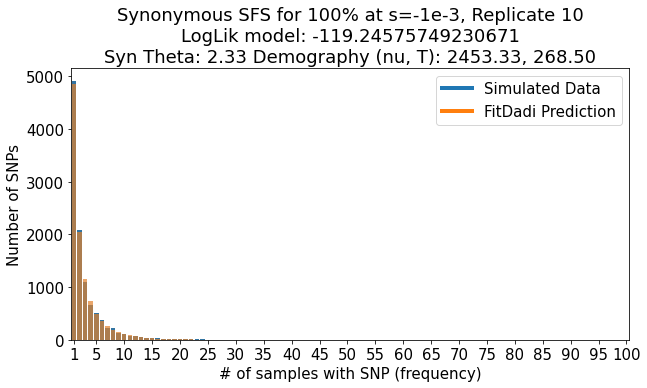

In [39]:
fig=plt.figure(figsize=[10,5])
ax=plt.gca()
sbn.barplot(x=np.arange(1,101), y=syn_sfs, color='C0')
sbn.barplot(x=np.arange(1,101), y=dadi_sfs, color='C1', alpha=0.7)

plt.rcParams['font.size'] = '15'

x_ticks=np.insert(np.arange(5,len(syn_sfs)+2,5),0,1)
x_ticks_loc=x_ticks-[1]

ax.set_xticks(x_ticks_loc)
ax.set_xticklabels(x_ticks)
ax.set_ylabel("Number of SNPs")
ax.set_xlabel("# of samples with SNP (frequency)")

#Create a custom legend
custom_lines = [Line2D([0], [0], color='C0', lw=4),
                Line2D([0], [0], color='C1', lw=4)]

ax.legend(custom_lines, ['Simulated Data', 'FitDadi Prediction'])

title_line1="Synonymous SFS for "+model_name+"\n"
title_line2="LogLik model: "+str(likelihood_model)+"\n"
title_line3="Syn Theta: {:.2f} ".format(theta_syn)
try:
    title_line4="Demography (nu, T): {0:.2f}, {1:.2f}".format(demog_params[0], demog_params[1])
except:
    title_line4="Demography (one epoch): {:.2f}".format(demog_params[0])
title_line=title_line1+title_line2+title_line3+title_line4

ax.set_title(title_line, fontsize=18)

## Plot Non-Synonymous SFS comparison

Text(0.5, 1.0, 'Non-Synonymous SFS for 100% at s=-1e-3, Replicate 10\nGamma Parameters (shape,scale): 0.2773466 , 399760142.0 \nPoisson LL: -40026.440')

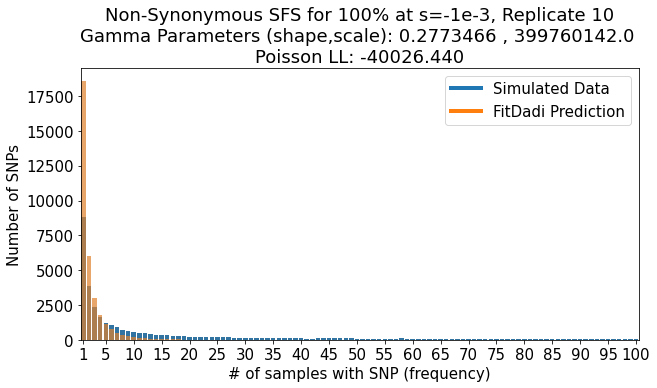

In [40]:
i=poisson_ll_all.index(max(poisson_ll_all))

nonsyn_sfs=np.array(nonsyn_sfs)
all_muts=nonsyn_sfs.sum()
frequency_nonsyn_muts=nonsyn_sfs/all_muts

dadi_nonsyn_sfs=Non_Syn_SFS_all[i]
all_muts_dadi=dadi_nonsyn_sfs.sum()
frequency_nonsyn_muts_dadi=dadi_nonsyn_sfs/all_muts_dadi

fig=plt.figure(figsize=[10,5])
ax=plt.gca()
sbn.barplot(x=np.arange(1,101), y=nonsyn_sfs, color='C0')
sbn.barplot(x=np.arange(1,101), y=dadi_nonsyn_sfs, color='C1', alpha=0.7)

plt.rcParams['font.size'] = '15'

x_ticks=np.insert(np.arange(5,len(frequency_nonsyn_muts)+2,5),0,1)
x_ticks_loc=x_ticks-[1]

ax.set_xticks(x_ticks_loc)
ax.set_xticklabels(x_ticks)
ax.set_ylabel("Number of SNPs")
ax.set_xlabel("# of samples with SNP (frequency)")

#Create a custom legend
custom_lines = [Line2D([0], [0], color='C0', lw=4),
                Line2D([0], [0], color='C1', lw=4)]

ax.legend(custom_lines, ['Simulated Data', 'FitDadi Prediction'])

title_line1="Non-Synonymous SFS for "+model_name+"\n"
title_line2="Gamma Parameters (shape,scale): {0:.7f} , {1:.1f} ".format(DFE_params_all[i][0], DFE_params_all[i][1])+"\n"
title_line3="Poisson LL: {0:.3f}".format(poisson_ll_all[i])
title_line=title_line1+title_line2+title_line3

ax.set_title(title_line, fontsize=18)
